In [1]:
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
from sklearn.neural_network import MLPRegressor

In [3]:
model_name = "multi_layer_perceptron"
display_name = "Multi-Layer \nPerceptron"

In [4]:
y_test = pd.read_csv('y_test.csv')
file = open("Selection Methods","rb")
sel_methods = np.load(file)

In [5]:
# train and test model
def get_best_model(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for',display_name,'with',method_string,'dataset')
    x_train = pd.read_csv('x_train' + method + sample_string + '.csv').values
    x_test = pd.read_csv('x_test' + method + '.csv').values
    pipe = Pipeline([('clf', MLPRegressor())])
    grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for',display_name,'with',method_string,"dataset:",grid.best_score_)
    best_args = grid.best_estimator_.get_params()
    print('\nBest hyperparameters for',display_name,'with',method_string,'dataset:')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for',display_name,'using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return grid.best_estimator_,grid.best_score_,mse,mae,r2

In [6]:
# save model
def save_model(model,method):
    with open('CrimeGUI/Models/'+model_name+method,'wb') as file:
        pickle.dump(model,file)

<h3>F-Regression feature selected dataset<h3>

In [28]:
is_sample = True
num_folds = 5
args = {'clf__activation':('identity','logistic','tanh','relu'),
        'clf__alpha':(0.000001,0.00001,0.0001,0.001,0.01,0.1),
        'clf__batch_size':(arange(100, 300, 100)),
        'clf__hidden_layer_sizes':((100,),(200,),(300,)),
        'clf__learning_rate':('constant', 'invscaling', 'adaptive'),
        'clf__max_iter':(arange(100,300,100)),
        'clf__momentum':(arange(0.7,0.9,0.1)),
        'clf__power_t':(0.001,0.01,0.1),
        'clf__random_state':([7]),
        'clf__solver':('lbfgs','logistic','adam'),
        'clf__tol':(0.0001,0.001,0.01)
       }

In [29]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _f_regression dataset
Fitting 5 folds for each of 69984 candidates, totalling 349920 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 212 tasks      | elapsed:   17.8s
[Parallel(n_jobs=6)]: Done 519 tasks      | elapsed:   43.3s
[Parallel(n_jobs=6)]: Done 967 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 2270 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 3021 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 3836 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 4758 tasks      | elapsed:  7.6min
[Parallel(n_jobs=6)]: Done 5708 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done 6758 tasks      | elapsed: 13.7min
[Parallel(n_jobs=6)]: Done 8023 tasks      | elapsed: 16.2min
[Parallel(n_jobs=6)]: Done 9572 tasks      | elapsed: 18.1min
[Parallel(n_jobs=6)]: Done 11133 tasks      | elapsed: 21.1min
[Parallel(n_jobs=6)]: Done 12696 tasks      | elapsed: 24.9m


Best score for Multi-Layer 
Perceptron with _f_regression dataset: 0.7533626543777094

Best hyperparameters for Multi-Layer 
Perceptron with _f_regression dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.1, batch_size=100,
             hidden_layer_sizes=(200,), max_iter=100, momentum=0.7,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.01))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.1, batch_size=100,
             hidden_layer_sizes=(200,), max_iter=100, momentum=0.7,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.01)
clf__activation : logistic
clf__alpha : 0.1
clf__batch_size : 100
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (200,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.7
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_

In [14]:
# further hyperparameter tuning
is_sample = True
num_folds = 5
args = {'clf__activation':('identity','logistic','tanh','relu'),
        'clf__alpha':(0.01,0.05,0.1),
        'clf__batch_size':(arange(100, 300, 100)),
        'clf__hidden_layer_sizes':((100,),(200,),(300,)),
        'clf__learning_rate':('constant', 'invscaling', 'adaptive'),
        'clf__max_iter':(arange(100,300,100)),
        'clf__momentum':(arange(0.3,0.7,0.1)),
        'clf__power_t':(0.001,0.005,0.01),
        'clf__random_state':([7]),
        'clf__solver':('lbfgs','logistic','adam'),
        'clf__tol':(0.005,0.01)
       }

In [15]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _f_regression dataset
Fitting 5 folds for each of 31104 candidates, totalling 155520 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 346 tasks      | elapsed:   13.3s
[Parallel(n_jobs=6)]: Done 846 tasks      | elapsed:   32.8s
[Parallel(n_jobs=6)]: Done 1546 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 2446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 3180 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 3830 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 4580 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 5430 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done 6380 tasks      | elapsed:  7.3min
[Parallel(n_jobs=6)]: Done 8320 tasks      | elapsed:  8.5min
[Parallel(n_jobs=6)]: Done 10620 tasks      | elapsed: 10.6min
[Parallel(n_jobs=6)]: Done 11984 tasks      | elapsed: 12.7min
[Parallel(n_jobs=6)]: Done 13648 tasks      | elapsed: 14.7min
[Parallel(n_jobs=6)]: Done 16548 tasks      | elapsed: 17


Best score for Multi-Layer 
Perceptron with _f_regression dataset: 0.7533695309449954

Best hyperparameters for Multi-Layer 
Perceptron with _f_regression dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.05, batch_size=100,
             hidden_layer_sizes=(300,), max_iter=100, momentum=0.3,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.01))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.05, batch_size=100,
             hidden_layer_sizes=(300,), max_iter=100, momentum=0.3,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.01)
clf__activation : logistic
clf__alpha : 0.05
clf__batch_size : 100
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (300,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.3
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__pow

In [13]:
#logistic, constant and lbfgs producing best results for dataset, locked these in and continue to tune continuous values
is_sample = True
num_folds = 5
args = {'clf__activation':(['logistic']),
        'clf__alpha':(arange(0.01,0.09,0.1)),
        'clf__batch_size':(arange(50, 400, 50)),
        'clf__hidden_layer_sizes':((100,),(200,),(300,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(100,400,100)),
        'clf__momentum':(arange(0.1,0.9,0.1)),
        'clf__power_t':(arange(0.001,0.009,0.001)),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.005,0.01,0.02,0.03)
       }

In [14]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _f_regression dataset
Fitting 5 folds for each of 16128 candidates, totalling 80640 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   10.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   45.5s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  4.8min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  6.9min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  9.5min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 12.4min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 15.8min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 20.2min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 24.9min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 30.1min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 38.9min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 50.4min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 62.9mi


Best score for Multi-Layer 
Perceptron with _f_regression dataset: 0.7530230936340118

Best hyperparameters for Multi-Layer 
Perceptron with _f_regression dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.01, batch_size=50,
             hidden_layer_sizes=(200,), max_iter=100, momentum=0.1,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.005))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.01, batch_size=50,
             hidden_layer_sizes=(200,), max_iter=100, momentum=0.1,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.005)
clf__activation : logistic
clf__alpha : 0.01
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (200,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.1
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__powe

In [12]:
# further hyperparameter tuning
is_sample = True
num_folds = 5
args = {'clf__activation':(['logistic']),
        'clf__alpha':(arange(0.005,0.01,0.001)),
        'clf__batch_size':(arange(30, 70, 10)),
        'clf__hidden_layer_sizes':((150,),(200,),(250,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(50,150,50)),
        'clf__momentum':(arange(0.05,0.1,0.01)),
        'clf__power_t':(arange(0.001,0.003,0.001)),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.004,0.005,0.006)
       }

In [13]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _f_regression dataset
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  6.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 10.2min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 16.1min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 20.6min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 27.4min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 35.3min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 43.5min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 52.7min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 64.1min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 74.2min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 86.3min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 98.3mi


Best score for Multi-Layer 
Perceptron with _f_regression dataset: 0.7530240091381551

Best hyperparameters for Multi-Layer 
Perceptron with _f_regression dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.005, batch_size=30,
             hidden_layer_sizes=(200,), max_iter=50, momentum=0.05,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.005))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.005, batch_size=30,
             hidden_layer_sizes=(200,), max_iter=50, momentum=0.05,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.005)
clf__activation : logistic
clf__alpha : 0.005
clf__batch_size : 30
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (200,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 50
clf__momentum : 0.05
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__p

In [30]:
# further hyperparameter tuning
is_sample = True
num_folds = 10
args = {'clf__activation':(['logistic']),
        'clf__alpha':(arange(0.001,0.006,0.001)),
        'clf__batch_size':(arange(10, 40, 10)),
        'clf__hidden_layer_sizes':((175,),(200,),(225,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(20,60,10)),
        'clf__momentum':(arange(0.01,0.06,0.01)),
        'clf__power_t':(arange(0.001,0.003,0.001)),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.004,0.005,0.006)
       }

In [31]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _f_regression dataset
Fitting 10 folds for each of 5400 candidates, totalling 54000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 12.5min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 17.5min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 23.7min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 33.2min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 42.8min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 52.3min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 62.2min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 76.6min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 88.5min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 101.8min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 118.7


Best score for Multi-Layer 
Perceptron with _f_regression dataset: 0.7517462832687578

Best hyperparameters for Multi-Layer 
Perceptron with _f_regression dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.005, batch_size=10,
             hidden_layer_sizes=(200,), max_iter=20, momentum=0.01,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.005))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.005, batch_size=10,
             hidden_layer_sizes=(200,), max_iter=20, momentum=0.01,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.005)
clf__activation : logistic
clf__alpha : 0.005
clf__batch_size : 10
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (200,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 20
clf__momentum : 0.01
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__p

In [26]:
#further tuning on 10 fold validation
is_sample = False
num_folds = 10
args = {'clf__activation':(['logistic']),
        'clf__alpha':(arange(0.001,0.006,0.001)),
        'clf__batch_size':(arange(5, 15, 5)),
        'clf__hidden_layer_sizes':((175,),(200,),(225,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(5,25,5)),
        'clf__momentum':(arange(0.001,0.011,0.001)),
        'clf__power_t':(arange(0.001,0.003,0.001)),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.004,0.005,0.006)
       }

In [27]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _f_regression dataset
Fitting 10 folds for each of 7200 candidates, totalling 72000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   37.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  6.6min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 14.9min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 24.7min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 39.2min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 58.2min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 69.8min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 88.9min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 114.7min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 136.5min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 174.6min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 196.9min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 231.5min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 2


Best score for Multi-Layer 
Perceptron with _f_regression dataset: 0.7437062501204444

Best hyperparameters for Multi-Layer 
Perceptron with _f_regression dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.003, batch_size=5,
             hidden_layer_sizes=(175,), max_iter=20, momentum=0.001,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.005))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.003, batch_size=5,
             hidden_layer_sizes=(175,), max_iter=20, momentum=0.001,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.005)
clf__activation : logistic
clf__alpha : 0.003
clf__batch_size : 5
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (175,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 20
clf__momentum : 0.001
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__p

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [36]:
#further tuning on 10 fold validation
is_sample = False
num_folds = 10
args = {'clf__activation':(['logistic']),
        'clf__alpha':(arange(0.001,0.004,0.001)),
        'clf__batch_size':(arange(5, 10, 5)),
        'clf__hidden_layer_sizes':((150,),(175,),(200,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(15,25,5)),
        'clf__momentum':(arange(0.001,0.003,0.001)),
        'clf__power_t':(arange(0.001,0.003,0.001)),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.004,0.005,0.006)
       }

In [37]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _f_regression dataset
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   52.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 11.1min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 20.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 32.2min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 46.2min
[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed: 57.0min finished



Best score for Multi-Layer 
Perceptron with _f_regression dataset: 0.7437062501204444

Best hyperparameters for Multi-Layer 
Perceptron with _f_regression dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.003, batch_size=5,
             hidden_layer_sizes=(175,), max_iter=20, momentum=0.001,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.005))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.003, batch_size=5,
             hidden_layer_sizes=(175,), max_iter=20, momentum=0.001,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.005)
clf__activation : logistic
clf__alpha : 0.003
clf__batch_size : 5
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (175,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 20
clf__momentum : 0.001
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__p

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [8]:
#final hyperparameters
is_sample = False
num_folds = 10
args = {'clf__activation':(['logistic']),
        'clf__alpha':([0.003]),
        'clf__batch_size':([5]),
        'clf__hidden_layer_sizes':([175]),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':([20]),
        'clf__momentum':([0.001]),
        'clf__power_t':([0.001]),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':([0.005])
       }

In [9]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _f_regression dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   20.7s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   20.7s finished



Best score for Multi-Layer 
Perceptron with _f_regression dataset: 0.7437062501204444

Best hyperparameters for Multi-Layer 
Perceptron with _f_regression dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.003, batch_size=5,
             hidden_layer_sizes=175, max_iter=20, momentum=0.001, power_t=0.001,
             random_state=7, solver='lbfgs', tol=0.005))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.003, batch_size=5,
             hidden_layer_sizes=175, max_iter=20, momentum=0.001, power_t=0.001,
             random_state=7, solver='lbfgs', tol=0.005)
clf__activation : logistic
clf__alpha : 0.003
clf__batch_size : 5
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : 175
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 20
clf__momentum : 0.001
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [12]:
save_model(f_reg_model,sel_methods[0])

<h3>Chi-Squared feature selected dataset<h3>

In [8]:
# folds reduced to 3 for initial exploration due to excessive processing time
is_sample = True
num_folds = 3
args = {'clf__activation':('identity','logistic','tanh','relu'),
        'clf__alpha':(0.000001,0.00001,0.0001,0.001,0.01,0.1),
        'clf__batch_size':(arange(100, 300, 100)),
        'clf__hidden_layer_sizes':((100,),(200,),(300,)),
        'clf__learning_rate':('constant', 'invscaling', 'adaptive'),
        'clf__max_iter':(arange(100,300,100)),
        'clf__momentum':(arange(0.7,0.9,0.1)),
        'clf__power_t':(0.001,0.01,0.1),
        'clf__random_state':([7]),
        'clf__solver':('lbfgs','logistic','adam'),
        'clf__tol':(0.0001,0.001,0.01)
       }

In [9]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _chi2 dataset
Fitting 3 folds for each of 69984 candidates, totalling 209952 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   21.5s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   48.4s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  7.0min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:  9.4min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 11.3min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 13.0min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 15.8min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 19.9min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 22.5min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 25.8mi


Best score for Multi-Layer 
Perceptron with _chi2 dataset: 0.7466949779592725

Best hyperparameters for Multi-Layer 
Perceptron with _chi2 dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=1e-05, batch_size=100, hidden_layer_sizes=(200,),
             momentum=0.7, power_t=0.001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=1e-05, batch_size=100, hidden_layer_sizes=(200,),
             momentum=0.7, power_t=0.001, random_state=7)
clf__activation : relu
clf__alpha : 1e-05
clf__batch_size : 100
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (200,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 200
clf__momentum : 0.7
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
clf__warm_start : False



In [15]:
# folds reduced to 3 for initial exploration due to excessive processing time
is_sample = True
num_folds = 3
args = {'clf__activation':('identity','logistic','tanh','relu'),
        'clf__alpha':(0.000001,0.00001),
        'clf__batch_size':(arange(100, 300, 100)),
        'clf__hidden_layer_sizes':((100,),(200,),(300,)),
        'clf__learning_rate':('constant', 'invscaling', 'adaptive'),
        'clf__max_iter':(arange(100,300,100)),
        'clf__momentum':(arange(0.3,0.7,0.1)),
        'clf__power_t':(0.001,0.002,0.003),
        'clf__random_state':([7]),
        'clf__solver':('lbfgs','logistic','adam'),
        'clf__tol':(arange(0.0001,0.0003,0.0001))
       }

In [16]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _chi2 dataset
Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   21.3s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   50.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  8.3min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 11.3min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 13.1min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 16.1min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 20.6min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 24.5min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 27.6min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 32.6mi


Best score for Multi-Layer 
Perceptron with _chi2 dataset: 0.7466949779592725

Best hyperparameters for Multi-Layer 
Perceptron with _chi2 dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=1e-05, batch_size=100, hidden_layer_sizes=(200,),
             momentum=0.3, power_t=0.001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=1e-05, batch_size=100, hidden_layer_sizes=(200,),
             momentum=0.3, power_t=0.001, random_state=7)
clf__activation : relu
clf__alpha : 1e-05
clf__batch_size : 100
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (200,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 200
clf__momentum : 0.3
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
clf__warm_start : False



In [16]:
# further hyperparameter tuning
is_sample = True
num_folds = 5
args = {'clf__activation':(['relu']),
        'clf__alpha':(0.00001,0.00002,0.00003),
        'clf__batch_size':(arange(50, 150, 25)),
        'clf__hidden_layer_sizes':((150,),(200,),(250,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(150,250,25)),
        'clf__momentum':(arange(0.1,0.4,0.1)),
        'clf__power_t':(0.001,0.002,0.003),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':(arange(0.0001,0.0003,0.0001))
       }

In [17]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _chi2 dataset
Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 13.9min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 24.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 36.4min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 51.6min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 70.9min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 90.6min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 112.8min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 139.3min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 170.4min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 200.2min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 231.4min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 267.7min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 


Best score for Multi-Layer 
Perceptron with _chi2 dataset: 0.747420823791542

Best hyperparameters for Multi-Layer 
Perceptron with _chi2 dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=(200,),
             max_iter=150, momentum=0.1, power_t=0.001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=(200,),
             max_iter=150, momentum=0.1, power_t=0.001, random_state=7)
clf__activation : relu
clf__alpha : 1e-05
clf__batch_size : 75
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (200,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 150
clf__momentum : 0.1
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
c

In [9]:
# further hyperparameter tuning
is_sample = True
num_folds = 10
args = {'clf__activation':(['relu']),
        'clf__alpha':(0.00001,0.00002,0.00003),
        'clf__batch_size':(arange(65, 85, 5)),
        'clf__hidden_layer_sizes':((175,),(200,),(225,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(50,200,50)),
        'clf__momentum':(arange(0.05,0.11,0.01)),
        'clf__power_t':(0.001,0.002,0.003),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':(arange(0.0001,0.0003,0.0001))
       }

In [10]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _chi2 dataset
Fitting 10 folds for each of 3888 candidates, totalling 38880 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   36.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  7.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 15.9min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 25.9min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 37.3min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 52.5min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 75.3min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 93.7min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 115.6min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 140.3min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 164.6min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 192.0min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 224.0min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 2


Best score for Multi-Layer 
Perceptron with _chi2 dataset: 0.7466440100711442

Best hyperparameters for Multi-Layer 
Perceptron with _chi2 dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=(175,),
             max_iter=150, momentum=0.05, power_t=0.001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=(175,),
             max_iter=150, momentum=0.05, power_t=0.001, random_state=7)
clf__activation : relu
clf__alpha : 1e-05
clf__batch_size : 75
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (175,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 150
clf__momentum : 0.05
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : Fal

In [28]:
# further hyperparameter tuning
is_sample = True
num_folds = 10
args = {'clf__activation':(['relu']),
        'clf__alpha':([0.00001]),
        'clf__batch_size':(arange(70, 80, 5)),
        'clf__hidden_layer_sizes':((170,),(175,),(180,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(125,175,25)),
        'clf__momentum':(arange(0.02,0.06,0.01)),
        'clf__power_t':([0.001]),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':([0.0001])
       }

In [29]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.




Running cross fold validation for Multi-Layer 
Perceptron with _chi2 dataset
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   49.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 10.5min
[Parallel(n_jobs=6)]: Done 480 out of 480 | elapsed: 11.6min finished



Best score for Multi-Layer 
Perceptron with _chi2 dataset: 0.7468575066215807

Best hyperparameters for Multi-Layer 
Perceptron with _chi2 dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=(175,),
             max_iter=125, momentum=0.02, power_t=0.001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=(175,),
             max_iter=125, momentum=0.02, power_t=0.001, random_state=7)
clf__activation : relu
clf__alpha : 1e-05
clf__batch_size : 75
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (175,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 125
clf__momentum : 0.02
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : Fal

In [38]:
# further hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['relu']),
        'clf__alpha':([0.00001]),
        'clf__batch_size':(arange(70, 80, 5)),
        'clf__hidden_layer_sizes':((170,),(175,),(180,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(125,175,25)),
        'clf__momentum':(arange(0.01,0.05,0.01)),
        'clf__power_t':([0.001]),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':([0.0001])
       }

In [39]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _chi2 dataset
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 21.1min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 47.9min
[Parallel(n_jobs=6)]: Done 480 out of 480 | elapsed: 52.2min finished



Best score for Multi-Layer 
Perceptron with _chi2 dataset: 0.7348444217122291

Best hyperparameters for Multi-Layer 
Perceptron with _chi2 dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=(170,),
             max_iter=125, momentum=0.01, power_t=0.001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=(170,),
             max_iter=125, momentum=0.01, power_t=0.001, random_state=7)
clf__activation : relu
clf__alpha : 1e-05
clf__batch_size : 75
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (170,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 125
clf__momentum : 0.01
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : Fal

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
# further hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['relu']),
        'clf__alpha':([0.00001]),
        'clf__batch_size':(arange(70, 80, 5)),
        'clf__hidden_layer_sizes':((150,),(160,),(170,),(180,),(190,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(75,175,25)),
        'clf__momentum':(arange(0.001,0.01,0.001)),
        'clf__power_t':([0.001]),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':([0.0001])
       }

In [55]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _chi2 dataset
Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 14.7min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 34.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 63.8min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 109.6min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 168.5min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 223.7min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 295.3min
[Parallel(n_jobs=6)]: Done 3600 out of 3600 | elapsed: 338.3min finished



Best score for Multi-Layer 
Perceptron with _chi2 dataset: 0.7352390287367413

Best hyperparameters for Multi-Layer 
Perceptron with _chi2 dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=(170,), max_iter=75,
             momentum=0.001, power_t=0.001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=(170,), max_iter=75,
             momentum=0.001, power_t=0.001, random_state=7)
clf__activation : relu
clf__alpha : 1e-05
clf__batch_size : 75
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (170,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 75
clf__momentum : 0.001
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : Fal

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# further hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['relu']),
        'clf__alpha':([0.00001]),
        'clf__batch_size':([75]),
        'clf__hidden_layer_sizes':([170]),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':([75]),
        'clf__momentum':([0.001]),
        'clf__power_t':([0.001]),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':([0.0001])
       }

In [11]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _chi2 dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   53.8s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   53.8s finished



Best score for Multi-Layer 
Perceptron with _chi2 dataset: 0.7352390287367413

Best hyperparameters for Multi-Layer 
Perceptron with _chi2 dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=170, max_iter=75,
             momentum=0.001, power_t=0.001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=1e-05, batch_size=75, hidden_layer_sizes=170, max_iter=75,
             momentum=0.001, power_t=0.001, random_state=7)
clf__activation : relu
clf__alpha : 1e-05
clf__batch_size : 75
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : 170
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 75
clf__momentum : 0.001
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
clf__w

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
# Hyperparameters stabalising and accuracy dropping slightly, model saved to avoid overfitting
save_model(chi2_model,sel_methods[1])

<h3>AdaBoost feature selected dataset<h3>

In [8]:
is_sample = True
num_folds = 3
args = {'clf__activation':('identity','logistic','tanh','relu'),
        'clf__alpha':(0.000001,0.00001,0.0001,0.001,0.01,0.1),
        'clf__batch_size':(arange(100, 300, 100)),
        'clf__hidden_layer_sizes':((100,),(200,),(300,)),
        'clf__learning_rate':('constant', 'invscaling', 'adaptive'),
        'clf__max_iter':(arange(100,300,100)),
        'clf__momentum':(arange(0.7,0.9,0.1)),
        'clf__power_t':(0.001,0.01,0.1),
        'clf__random_state':([7]),
        'clf__solver':('lbfgs','logistic','adam'),
        'clf__tol':(0.0001,0.001,0.01)
       }

In [9]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _adaboost dataset
Fitting 3 folds for each of 69984 candidates, totalling 209952 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   24.7s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   53.7s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 11.3min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 13.5min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 15.4min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 18.6min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 23.9min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 27.2min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 30.9mi


Best score for Multi-Layer 
Perceptron with _adaboost dataset: 0.7531055438512761

Best hyperparameters for Multi-Layer 
Perceptron with _adaboost dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=0.1, batch_size=100, momentum=0.7, power_t=0.001,
             random_state=7))]
verbose : False
clf : MLPRegressor(alpha=0.1, batch_size=100, momentum=0.7, power_t=0.001,
             random_state=7)
clf__activation : relu
clf__alpha : 0.1
clf__batch_size : 100
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 200
clf__momentum : 0.7
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
clf__warm_start : False

Prediction scores for Multi-Layer 
Perceptron using 

In [17]:
#futher hyperparameter tuning
is_sample = True
num_folds = 3
args = {'clf__activation':('identity','logistic','tanh','relu'),
        'clf__alpha':(0.05,0.1,0.2,0.3),
        'clf__batch_size':(arange(100, 300, 100)),
        'clf__hidden_layer_sizes':((100,),(200,),(300,)),
        'clf__learning_rate':('constant', 'invscaling', 'adaptive'),
        'clf__max_iter':(arange(100,300,100)),
        'clf__momentum':(arange(0.3,0.8,0.1)),
        'clf__power_t':(0.001,0.002,0.003),
        'clf__random_state':([7]),
        'clf__solver':('lbfgs','logistic','adam'),
        'clf__tol':(0.0001,0.0002,0.0003)
       }

In [18]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _adaboost dataset
Fitting 3 folds for each of 77760 candidates, totalling 233280 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   23.5s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   53.8s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  7.3min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:  9.9min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 13.0min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 18.1min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 23.6min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 26.3min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 29.1min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 33.9mi


Best score for Multi-Layer 
Perceptron with _adaboost dataset: 0.7531055438512761

Best hyperparameters for Multi-Layer 
Perceptron with _adaboost dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=0.1, batch_size=100, momentum=0.3, power_t=0.001,
             random_state=7))]
verbose : False
clf : MLPRegressor(alpha=0.1, batch_size=100, momentum=0.3, power_t=0.001,
             random_state=7)
clf__activation : relu
clf__alpha : 0.1
clf__batch_size : 100
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 200
clf__momentum : 0.3
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
clf__warm_start : False

Prediction scores for Multi-Layer 
Perceptron using 

In [20]:
#futher hyperparameter tuning
is_sample = True
num_folds = 5
args = {'clf__activation':(['relu']),
        'clf__alpha':(arange(0.05,0.15,0.01)),
        'clf__batch_size':(arange(50, 150, 25)),
        'clf__hidden_layer_sizes':((50,),(100,),(150,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(150,250,50)),
        'clf__momentum':(arange(0.1,0.4,0.1)),
        'clf__power_t':(0.0005,0.001,0.002),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':(0.0001,0.0002,0.0003)
       }

In [21]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _adaboost dataset
Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   43.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  8.5min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 18.1min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 29.3min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 40.2min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 51.2min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 64.6min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 78.5min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 98.8min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 119.3min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 139.3min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 160.7min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 191.5min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 21


Best score for Multi-Layer 
Perceptron with _adaboost dataset: 0.7532392185634029

Best hyperparameters for Multi-Layer 
Perceptron with _adaboost dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=0.07, batch_size=50, max_iter=150, momentum=0.1,
             power_t=0.0005, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=0.07, batch_size=50, max_iter=150, momentum=0.1,
             power_t=0.0005, random_state=7)
clf__activation : relu
clf__alpha : 0.07
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 150
clf__momentum : 0.1
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0005
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
clf__warm_start : False

Prediction scores for

In [10]:
#futher hyperparameter tuning
is_sample = True
num_folds = 5
args = {'clf__activation':(['relu']),
        'clf__alpha':(arange(0.05,0.09,0.01)),
        'clf__batch_size':(arange(40, 60, 10)),
        'clf__hidden_layer_sizes':((75,),(100,),(125,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(100,200,50)),
        'clf__momentum':(arange(0.07,0.11,0.01)),
        'clf__power_t':(0.0003,0.0007,0.0001),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':(0.0001,0.0002)
       }

In [11]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _adaboost dataset
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   49.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 10.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 17.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 27.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 38.2min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 52.5min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 67.9min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 86.4min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 106.2min
[Parallel(n_jobs=6)]: Done 5760 out of 5760 | elapsed: 121.5min finished



Best score for Multi-Layer 
Perceptron with _adaboost dataset: 0.7537826689906509

Best hyperparameters for Multi-Layer 
Perceptron with _adaboost dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=0.07, batch_size=50, max_iter=100, momentum=0.07,
             power_t=0.0003, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=0.07, batch_size=50, max_iter=100, momentum=0.07,
             power_t=0.0003, random_state=7)
clf__activation : relu
clf__alpha : 0.07
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.07
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0003
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
clf__warm_start : False

Prediction scores 

In [30]:
#futher hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['relu']),
        'clf__alpha':(arange(0.05,0.09,0.01)),
        'clf__batch_size':(arange(40, 60, 10)),
        'clf__hidden_layer_sizes':((75,),(100,),(125,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(75,125,25)),
        'clf__momentum':(arange(0.02,0.06,0.01)),
        'clf__power_t':(arange(0.0001,0.0004,0.0001)),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':(0.0001,0.0002)
       }

In [31]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _adaboost dataset
Fitting 10 folds for each of 1152 candidates, totalling 11520 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 11.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 26.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 45.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 76.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 107.8min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 141.2min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 192.5min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 242.6min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 292.4min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 354.2min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 423.5min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 487.3min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 564.7min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapse


Best score for Multi-Layer 
Perceptron with _adaboost dataset: 0.743109117622246

Best hyperparameters for Multi-Layer 
Perceptron with _adaboost dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=0.05, batch_size=50, hidden_layer_sizes=(125,), max_iter=75,
             momentum=0.02, power_t=0.0001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=0.05, batch_size=50, hidden_layer_sizes=(125,), max_iter=75,
             momentum=0.02, power_t=0.0001, random_state=7)
clf__activation : relu
clf__alpha : 0.05
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (125,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 75
clf__momentum : 0.02
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose :

In [40]:
#futher hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['relu']),
        'clf__alpha':(arange(0.01,0.06,0.01)),
        'clf__batch_size':(arange(40, 60, 10)),
        'clf__hidden_layer_sizes':((100,),(125,),(150,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(50,100,25)),
        'clf__momentum':(arange(0.02,0.06,0.01)),
        'clf__power_t':(arange(0.0001,0.0003,0.0001)),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':([0.0001])
       }

In [41]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _adaboost dataset
Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 15.4min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 42.1min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 73.8min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 107.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 144.8min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 191.0min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 236.6min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 288.2min
[Parallel(n_jobs=6)]: Done 4800 out of 4800 | elapsed: 335.8min finished



Best score for Multi-Layer 
Perceptron with _adaboost dataset: 0.7434711908258655

Best hyperparameters for Multi-Layer 
Perceptron with _adaboost dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=0.01, batch_size=50, max_iter=75, momentum=0.02,
             power_t=0.0001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=0.01, batch_size=50, max_iter=75, momentum=0.02,
             power_t=0.0001, random_state=7)
clf__activation : relu
clf__alpha : 0.01
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 75
clf__momentum : 0.02
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
clf__warm_start : False

Prediction scores for

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
#futher hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['relu']),
        'clf__alpha':(arange(0.01,0.04,0.01)),
        'clf__batch_size':(arange(40, 60, 10)),
        'clf__hidden_layer_sizes':((100,),(125,),(150,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(50,100,25)),
        'clf__momentum':(arange(0.01,0.05,0.01)),
        'clf__power_t':(arange(0.0001,0.0003,0.0001)),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':([0.0001])
       }

In [9]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _adaboost dataset
Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 15.0min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 41.4min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 72.0min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 105.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 142.2min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 185.8min
[Parallel(n_jobs=6)]: Done 2880 out of 2880 | elapsed: 213.1min finished



Best score for Multi-Layer 
Perceptron with _adaboost dataset: 0.7434711908258655

Best hyperparameters for Multi-Layer 
Perceptron with _adaboost dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=0.01, batch_size=50, max_iter=75, momentum=0.01,
             power_t=0.0001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=0.01, batch_size=50, max_iter=75, momentum=0.01,
             power_t=0.0001, random_state=7)
clf__activation : relu
clf__alpha : 0.01
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 75
clf__momentum : 0.01
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
clf__warm_start : False

Prediction scores for

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
#futher hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['relu']),
        'clf__alpha':([0.01]),
        'clf__batch_size':([50]),
        'clf__hidden_layer_sizes':([100]),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':([75]),
        'clf__momentum':([0.01]),
        'clf__power_t':([0.0001]),
        'clf__random_state':([7]),
        'clf__solver':(['adam']),
        'clf__tol':([0.0001])
       }

In [25]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.




Running cross fold validation for Multi-Layer 
Perceptron with _adaboost dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  1.2min finished



Best score for Multi-Layer 
Perceptron with _adaboost dataset: 0.7434711908258655

Best hyperparameters for Multi-Layer 
Perceptron with _adaboost dataset:
memory : None
steps : [('clf', MLPRegressor(alpha=0.01, batch_size=50, hidden_layer_sizes=100, max_iter=75,
             momentum=0.01, power_t=0.0001, random_state=7))]
verbose : False
clf : MLPRegressor(alpha=0.01, batch_size=50, hidden_layer_sizes=100, max_iter=75,
             momentum=0.01, power_t=0.0001, random_state=7)
clf__activation : relu
clf__alpha : 0.01
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : 100
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 75
clf__momentum : 0.01
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0001
clf__random_state : 7
clf__shuffle : True
clf__solver : adam
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf__verbose : False
c

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
# hyperparameters stabalised, model saved
save_model(ada_model,sel_methods[2])

<h3>Equal business and crime feature selected dataset<h3>

In [10]:
is_sample = True
num_folds = 3
args = {'clf__activation':('identity','logistic','tanh','relu'),
        'clf__alpha':(0.000001,0.00001,0.0001,0.001,0.01,0.1),
        'clf__batch_size':(arange(100, 300, 100)),
        'clf__hidden_layer_sizes':((100,),(200,),(300,)),
        'clf__learning_rate':('constant', 'invscaling', 'adaptive'),
        'clf__max_iter':(arange(100,300,100)),
        'clf__momentum':(arange(0.7,0.9,0.1)),
        'clf__power_t':(0.001,0.01,0.1),
        'clf__random_state':([7]),
        'clf__solver':('lbfgs','logistic','adam'),
        'clf__tol':(0.0001,0.001,0.01)
       }

In [11]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _equal_crime_and_business dataset
Fitting 3 folds for each of 69984 candidates, totalling 209952 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   20.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   46.3s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 10.6min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 12.8min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 15.0min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 18.5min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 23.7min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 27.1min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 30.7mi


Best score for Multi-Layer 
Perceptron with _equal_crime_and_business dataset: 0.7414148711830992

Best hyperparameters for Multi-Layer 
Perceptron with _equal_crime_and_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', batch_size=100, max_iter=100, momentum=0.7,
             power_t=0.001, random_state=7, solver='lbfgs'))]
verbose : False
clf : MLPRegressor(activation='logistic', batch_size=100, max_iter=100, momentum=0.7,
             power_t=0.001, random_state=7, solver='lbfgs')
clf__activation : logistic
clf__alpha : 0.0001
clf__batch_size : 100
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.7
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : lbfgs
clf__tol : 0.0001
clf__

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [8]:
#futher hyperparameter tuning
is_sample = True
num_folds = 3
args = {'clf__activation':('identity','logistic','tanh','relu'),
        'clf__alpha':(0.0001,0.0002,0.0003),
        'clf__batch_size':(arange(50, 150, 50)),
        'clf__hidden_layer_sizes':((50,),(100,),(150,)),
        'clf__learning_rate':('constant', 'invscaling', 'adaptive'),
        'clf__max_iter':(arange(50,150,50)),
        'clf__momentum':(arange(0.4,0.7,0.1)),
        'clf__power_t':(0.001,0.002),
        'clf__random_state':([7]),
        'clf__solver':('lbfgs','logistic','adam'),
        'clf__tol':(0.001,0.002)
       }

In [9]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _equal_crime_and_business dataset
Fitting 3 folds for each of 15552 candidates, totalling 46656 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   20.5s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   46.8s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:  7.0min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:  8.6min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 10.7min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 12.4min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 15.0min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 18.2min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 20.6mi


Best score for Multi-Layer 
Perceptron with _equal_crime_and_business dataset: 0.7414148711830992

Best hyperparameters for Multi-Layer 
Perceptron with _equal_crime_and_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', batch_size=50, max_iter=100, momentum=0.4,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.001))]
verbose : False
clf : MLPRegressor(activation='logistic', batch_size=50, max_iter=100, momentum=0.4,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.001)
clf__activation : logistic
clf__alpha : 0.0001
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.4
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : lbfgs
clf_

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [24]:
#futher hyperparameter tuning
is_sample = True
num_folds = 5
args = {'clf__activation':(['logistic']),
        'clf__alpha':(0.0001,0.0002,0.0003),
        'clf__batch_size':(arange(50, 100, 25)),
        'clf__hidden_layer_sizes':((75,),(100,),(125,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(50,150,50)),
        'clf__momentum':(arange(0.1,0.6,0.1)),
        'clf__power_t':(0.001,0.002),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.0005,0.001,0.002)
       }

In [25]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _equal_crime_and_business dataset
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   18.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  8.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 14.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 22.7min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 30.9min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 40.8min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 52.2min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 65.6min
[Parallel(n_jobs=6)]: Done 5400 out of 5400 | elapsed: 72.5min finished



Best score for Multi-Layer 
Perceptron with _equal_crime_and_business dataset: 0.7417138155924298

Best hyperparameters for Multi-Layer 
Perceptron with _equal_crime_and_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.0003, batch_size=50, max_iter=100,
             momentum=0.1, power_t=0.001, random_state=7, solver='lbfgs',
             tol=0.002))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.0003, batch_size=50, max_iter=100,
             momentum=0.1, power_t=0.001, random_state=7, solver='lbfgs',
             tol=0.002)
clf__activation : logistic
clf__alpha : 0.0003
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.1
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<h3> Retrain on revised dataset <h3>

In [18]:
def get_best_model_revised(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '_revised.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for',display_name,'with',method_string,'dataset')
    x_train = pd.read_csv('x_train' + method + sample_string + '_revised.csv').values
    x_test = pd.read_csv('x_test' + method + '_revised.csv').values
    pipe = Pipeline([('clf', MLPRegressor())])
    grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for',display_name,'with',method_string,"dataset:",grid.best_score_)
    best_args = grid.best_estimator_.get_params()
    print('\nBest hyperparameters for',display_name,'with',method_string,'dataset:')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for',display_name,'using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return grid.best_estimator_,grid.best_score_,mse,mae,r2

In [11]:
#futher hyperparameter tuning
is_sample = True
num_folds = 5
args = {'clf__activation':(['logistic']),
        'clf__alpha':(0.0001,0.0002,0.0003),
        'clf__batch_size':(arange(50, 100, 25)),
        'clf__hidden_layer_sizes':((75,),(100,),(125,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(50,150,50)),
        'clf__momentum':(arange(0.1,0.6,0.1)),
        'clf__power_t':(0.001,0.002),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.0005,0.001,0.002)
       }

In [12]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model_revised(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _equal_crime_and_business dataset
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   16.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  8.2min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 13.0min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 19.9min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 26.4min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 34.4min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 43.7min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 54.6min
[Parallel(n_jobs=6)]: Done 5400 out of 5400 | elapsed: 60.3min finished



Best score for Multi-Layer 
Perceptron with _equal_crime_and_business dataset: 0.7422793327280195

Best hyperparameters for Multi-Layer 
Perceptron with _equal_crime_and_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', batch_size=50, max_iter=100, momentum=0.1,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.0005))]
verbose : False
clf : MLPRegressor(activation='logistic', batch_size=50, max_iter=100, momentum=0.1,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.0005)
clf__activation : logistic
clf__alpha : 0.0001
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.1
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : lbfgs
cl

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [32]:
#futher hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['logistic']),
        'clf__alpha':(0.0001,0.0002,0.0003),
        'clf__batch_size':(arange(25, 75, 25)),
        'clf__hidden_layer_sizes':((75,),(100,),(125,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(75,125,25)),
        'clf__momentum':(arange(0.1,0.3,0.1)),
        'clf__power_t':(0.001,0.002),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.0005,0.001)
       }

In [33]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model_revised(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _equal_crime_and_business dataset
Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  8.9min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 25.3min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 44.8min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 71.5min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 104.8min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 145.3min
[Parallel(n_jobs=6)]: Done 2880 out of 2880 | elapsed: 172.9min finished



Best score for Multi-Layer 
Perceptron with _equal_crime_and_business dataset: 0.7349072078250235

Best hyperparameters for Multi-Layer 
Perceptron with _equal_crime_and_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.0002, batch_size=25,
             hidden_layer_sizes=(75,), max_iter=100, momentum=0.1,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.0005))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.0002, batch_size=25,
             hidden_layer_sizes=(75,), max_iter=100, momentum=0.1,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.0005)
clf__activation : logistic
clf__alpha : 0.0002
clf__batch_size : 25
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (75,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.1
clf__n_iter_no_change : 10
clf__nester

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [42]:
#futher hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['logistic']),
        'clf__alpha':(0.0001,0.0002,0.0003),
        'clf__batch_size':(arange(10, 30, 5)),
        'clf__hidden_layer_sizes':((50,),(175,),(100,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(75,125,25)),
        'clf__momentum':(arange(0.1,0.3,0.1)),
        'clf__power_t':(0.001,0.002),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.0005,0.001)
       }

In [43]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model_revised(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _equal_crime_and_business dataset
Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  7.8min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 29.9min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 55.6min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 86.0min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 123.9min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 164.7min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 221.8min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 277.7min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 345.4min
[Parallel(n_jobs=6)]: Done 5760 out of 5760 | elapsed: 404.9min finished



Best score for Multi-Layer 
Perceptron with _equal_crime_and_business dataset: 0.7351704092879979

Best hyperparameters for Multi-Layer 
Perceptron with _equal_crime_and_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.0003, batch_size=10,
             hidden_layer_sizes=(50,), max_iter=100, momentum=0.1,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.0005))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.0003, batch_size=10,
             hidden_layer_sizes=(50,), max_iter=100, momentum=0.1,
             power_t=0.001, random_state=7, solver='lbfgs', tol=0.0005)
clf__activation : logistic
clf__alpha : 0.0003
clf__batch_size : 10
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (50,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.1
clf__n_iter_no_change : 10
clf__nester

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [19]:
#futher hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['logistic']),
        'clf__alpha':([0.0003]),
        'clf__batch_size':([10]),
        'clf__hidden_layer_sizes':([50]),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':([100]),
        'clf__momentum':([0.1]),
        'clf__power_t':([0.001]),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':([0.0005])
       }

In [20]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model_revised(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _equal_crime_and_business dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   22.4s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   22.4s finished



Best score for Multi-Layer 
Perceptron with _equal_crime_and_business dataset: 0.7351704092879979

Best hyperparameters for Multi-Layer 
Perceptron with _equal_crime_and_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.0003, batch_size=10,
             hidden_layer_sizes=50, max_iter=100, momentum=0.1, power_t=0.001,
             random_state=7, solver='lbfgs', tol=0.0005))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.0003, batch_size=10,
             hidden_layer_sizes=50, max_iter=100, momentum=0.1, power_t=0.001,
             random_state=7, solver='lbfgs', tol=0.0005)
clf__activation : logistic
clf__alpha : 0.0003
clf__batch_size : 10
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : 50
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 100
clf__momentum : 0.1
clf__n_iter_no_change : 10
clf__nesterovs_momen

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [26]:
# slight score reduction, model save to prevent overfitting from further training
save_model(equal_model,sel_methods[3])

<h3>Business only feature selected dataset<h3>

In [12]:
#futher hyperparameter tuning
is_sample = True
num_folds = 3
args = {'clf__activation':('identity','logistic','tanh','relu'),
        'clf__alpha':(0.000001,0.00001,0.0001,0.001,0.01,0.1),
        'clf__batch_size':(arange(100, 300, 100)),
        'clf__hidden_layer_sizes':((100,),(200,),(300,)),
        'clf__learning_rate':('constant', 'invscaling', 'adaptive'),
        'clf__max_iter':(arange(100,300,100)),
        'clf__momentum':(arange(0.7,0.9,0.1)),
        'clf__power_t':(0.001,0.01,0.1),
        'clf__random_state':([7]),
        'clf__solver':('lbfgs','logistic','adam'),
        'clf__tol':(0.0001,0.001,0.01)
       }

In [13]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _all_business dataset
Fitting 3 folds for each of 69984 candidates, totalling 209952 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   31.7s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  9.2min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 13.2min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 18.5min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 22.3min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 25.6min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 31.2min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 39.5min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 44.9min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 51.4mi


Best score for Multi-Layer 
Perceptron with _all_business dataset: 0.5200704955823617

Best hyperparameters for Multi-Layer 
Perceptron with _all_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.01, batch_size=100, momentum=0.7,
             power_t=0.001, random_state=7, solver='lbfgs'))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.01, batch_size=100, momentum=0.7,
             power_t=0.001, random_state=7, solver='lbfgs')
clf__activation : logistic
clf__alpha : 0.01
clf__batch_size : 100
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 200
clf__momentum : 0.7
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : lbfgs
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf_

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [10]:
#futher hyperparameter tuning
is_sample = True
num_folds = 3
args = {'clf__activation':('identity','logistic','tanh','relu'),
        'clf__alpha':(0.01,0.02,0.03),
        'clf__batch_size':(arange(100, 300, 100)),
        'clf__hidden_layer_sizes':((100,),(200,),(300,)),
        'clf__learning_rate':('constant', 'invscaling', 'adaptive'),
        'clf__max_iter':(arange(100,300,100)),
        'clf__momentum':(arange(0.3,0.7,0.1)),
        'clf__power_t':(0.001,0.002,0.003),
        'clf__random_state':([7]),
        'clf__solver':('lbfgs','logistic','adam'),
        'clf__tol':(0.0001,0.0002,0.0003)
       }

In [11]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _all_business dataset
Fitting 3 folds for each of 46656 candidates, totalling 139968 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   11.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   51.9s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  5.6min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 12.3min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 18.8min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 25.5min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 34.1min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 42.4min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 46.7min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 53.5min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 63.1min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 78.8mi


Best score for Multi-Layer 
Perceptron with _all_business dataset: 0.5200704955823617

Best hyperparameters for Multi-Layer 
Perceptron with _all_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.01, batch_size=100, momentum=0.3,
             power_t=0.001, random_state=7, solver='lbfgs'))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.01, batch_size=100, momentum=0.3,
             power_t=0.001, random_state=7, solver='lbfgs')
clf__activation : logistic
clf__alpha : 0.01
clf__batch_size : 100
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (100,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 200
clf__momentum : 0.3
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.001
clf__random_state : 7
clf__shuffle : True
clf__solver : lbfgs
clf__tol : 0.0001
clf__validation_fraction : 0.1
clf_

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [26]:
#futher hyperparameter tuning
is_sample = True
num_folds = 5
args = {'clf__activation':(['logistic']),
        'clf__alpha':(0.005,0.01,0.02),
        'clf__batch_size':(arange(50, 150, 50)),
        'clf__hidden_layer_sizes':((50,),(100,),(150,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(150,250,50)),
        'clf__momentum':(arange(0.1,0.5,0.1)),
        'clf__power_t':(0.0005,0.001,0.002),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.0001,0.0002,0.0003)
       }

In [27]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _all_business dataset
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   36.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  8.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 21.2min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 38.0min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 52.2min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 73.3min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 97.0min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 121.7min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 152.7min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 186.6min
[Parallel(n_jobs=6)]: Done 6480 out of 6480 | elapsed: 206.9min finished



Best score for Multi-Layer 
Perceptron with _all_business dataset: 0.5244281560174778

Best hyperparameters for Multi-Layer 
Perceptron with _all_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.005, batch_size=50,
             hidden_layer_sizes=(50,), max_iter=150, momentum=0.1,
             power_t=0.0005, random_state=7, solver='lbfgs'))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.005, batch_size=50,
             hidden_layer_sizes=(50,), max_iter=150, momentum=0.1,
             power_t=0.0005, random_state=7, solver='lbfgs')
clf__activation : logistic
clf__alpha : 0.005
clf__batch_size : 50
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (50,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 150
clf__momentum : 0.1
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0005
clf__ra

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<h3> Retrain on revised dataset <h3>

In [13]:
is_sample = True
num_folds = 5
args = {'clf__activation':(['logistic']),
        'clf__alpha':(0.001,0.007,0.001),
        'clf__batch_size':(arange(20, 70, 10)),
        'clf__hidden_layer_sizes':((30,),(50,),(70,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(50,200,50)),
        'clf__momentum':(arange(0.05,0.12,0.01)),
        'clf__power_t':(0.0001,0.0007,0.0001),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.0001,0.0002,0.0003)
       }

In [14]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model_revised(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _all_business dataset
Fitting 5 folds for each of 8505 candidates, totalling 42525 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   26.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  5.4min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 10.2min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 15.8min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 22.5min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 26.8min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 34.5min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 44.1min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 50.6min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 63.7min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 70.3min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 84.7mi


Best score for Multi-Layer 
Perceptron with _all_business dataset: 0.5379133351354367

Best hyperparameters for Multi-Layer 
Perceptron with _all_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.001, batch_size=20,
             hidden_layer_sizes=(30,), max_iter=150, momentum=0.05,
             power_t=0.0001, random_state=7, solver='lbfgs'))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.001, batch_size=20,
             hidden_layer_sizes=(30,), max_iter=150, momentum=0.05,
             power_t=0.0001, random_state=7, solver='lbfgs')
clf__activation : logistic
clf__alpha : 0.001
clf__batch_size : 20
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (30,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 150
clf__momentum : 0.05
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0001
clf_

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [34]:
#futher hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['logistic']),
        'clf__alpha':(0.001,0.004,0.001),
        'clf__batch_size':(arange(10, 30, 10)),
        'clf__hidden_layer_sizes':((20,),(30,),(40,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(125,175,25)),
        'clf__momentum':(arange(0.01,0.06,0.01)),
        'clf__power_t':(arange(0.0001,0.0004,0.0001)),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':(0.0001,0.0002,0.0003)
       }

In [35]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model_revised(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _all_business dataset
Fitting 10 folds for each of 1620 candidates, totalling 16200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   43.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 14.8min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 26.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 42.8min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 66.0min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 85.0min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 105.1min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 136.2min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 164.2min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 195.0min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 234.0min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 267.5min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 


Best score for Multi-Layer 
Perceptron with _all_business dataset: 0.5517490777968008

Best hyperparameters for Multi-Layer 
Perceptron with _all_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.004, batch_size=10,
             hidden_layer_sizes=(40,), max_iter=150, momentum=0.01,
             power_t=0.0001, random_state=7, solver='lbfgs'))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.004, batch_size=10,
             hidden_layer_sizes=(40,), max_iter=150, momentum=0.01,
             power_t=0.0001, random_state=7, solver='lbfgs')
clf__activation : logistic
clf__alpha : 0.004
clf__batch_size : 10
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (40,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 150
clf__momentum : 0.01
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0001
clf_

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [49]:
#futher hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['logistic']),
        'clf__alpha':(0.001,0.006,0.001),
        'clf__batch_size':(arange(5, 20, 5)),
        'clf__hidden_layer_sizes':((20,),(30,),(40,),(50,),(60,)),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':(arange(125,175,25)),
        'clf__momentum':(arange(0.01,0.03,0.01)),
        'clf__power_t':(arange(0.0001,0.0003,0.0001)),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':([0.0001])
       }

In [50]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model_revised(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _all_business dataset
Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   45.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 16.9min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 31.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 49.9min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 70.5min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 99.2min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 130.9min
[Parallel(n_jobs=6)]: Done 3600 out of 3600 | elapsed: 147.6min finished



Best score for Multi-Layer 
Perceptron with _all_business dataset: 0.5509371192221354

Best hyperparameters for Multi-Layer 
Perceptron with _all_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.001, batch_size=5,
             hidden_layer_sizes=(40,), max_iter=150, momentum=0.01,
             power_t=0.0001, random_state=7, solver='lbfgs'))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.001, batch_size=5,
             hidden_layer_sizes=(40,), max_iter=150, momentum=0.01,
             power_t=0.0001, random_state=7, solver='lbfgs')
clf__activation : logistic
clf__alpha : 0.001
clf__batch_size : 5
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : (40,)
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 150
clf__momentum : 0.01
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0001
clf__ra

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [21]:
#futher hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__activation':(['logistic']),
        'clf__alpha':([0.001]),
        'clf__batch_size':([5]),
        'clf__hidden_layer_sizes':([40]),
        'clf__learning_rate':(['constant']),
        'clf__max_iter':([150]),
        'clf__momentum':([0.01]),
        'clf__power_t':([0.0001]),
        'clf__random_state':([7]),
        'clf__solver':(['lbfgs']),
        'clf__tol':([0.0001])
       }

In [22]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model_revised(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Multi-Layer 
Perceptron with _all_business dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   26.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   26.1s finished



Best score for Multi-Layer 
Perceptron with _all_business dataset: 0.5509371192221354

Best hyperparameters for Multi-Layer 
Perceptron with _all_business dataset:
memory : None
steps : [('clf', MLPRegressor(activation='logistic', alpha=0.001, batch_size=5,
             hidden_layer_sizes=40, max_iter=150, momentum=0.01, power_t=0.0001,
             random_state=7, solver='lbfgs'))]
verbose : False
clf : MLPRegressor(activation='logistic', alpha=0.001, batch_size=5,
             hidden_layer_sizes=40, max_iter=150, momentum=0.01, power_t=0.0001,
             random_state=7, solver='lbfgs')
clf__activation : logistic
clf__alpha : 0.001
clf__batch_size : 5
clf__beta_1 : 0.9
clf__beta_2 : 0.999
clf__early_stopping : False
clf__epsilon : 1e-08
clf__hidden_layer_sizes : 40
clf__learning_rate : constant
clf__learning_rate_init : 0.001
clf__max_fun : 15000
clf__max_iter : 150
clf__momentum : 0.01
clf__n_iter_no_change : 10
clf__nesterovs_momentum : True
clf__power_t : 0.0001
clf__random_stat

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [27]:
# score beginning to drop, model saved to prevent overfitting
save_model(bus_model,sel_methods[4])

<h3>Visualise scores<h3>

In [34]:
training_scores = [f_reg_train_score, chi2_train_score, ada_train_score, equal_train_score, bus_train_score]
mse_scores = [f_reg_mse, chi2_mse, ada_mse, equal_mse, bus_mse]
mae_scores = [f_reg_mae, chi2_mae, ada_mae, equal_mae, bus_mae]
r2_scores = [f_reg_r2, chi2_r2, ada_r2, equal_r2, bus_r2]
datasets = ["F-Regression","Chi-Squared","AdaBoost","Equal Business\nand Crime","All Business"]
y_select = np.arange(len(datasets))

<BarContainer object of 5 artists>

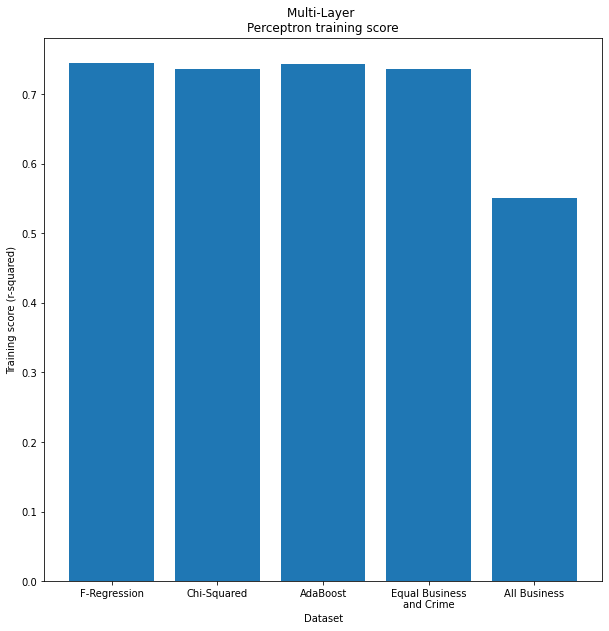

In [36]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " training score")
plt.xlabel("Dataset")
plt.ylabel("Training score (r-squared)")
plt.bar(y_select, training_scores)

<BarContainer object of 5 artists>

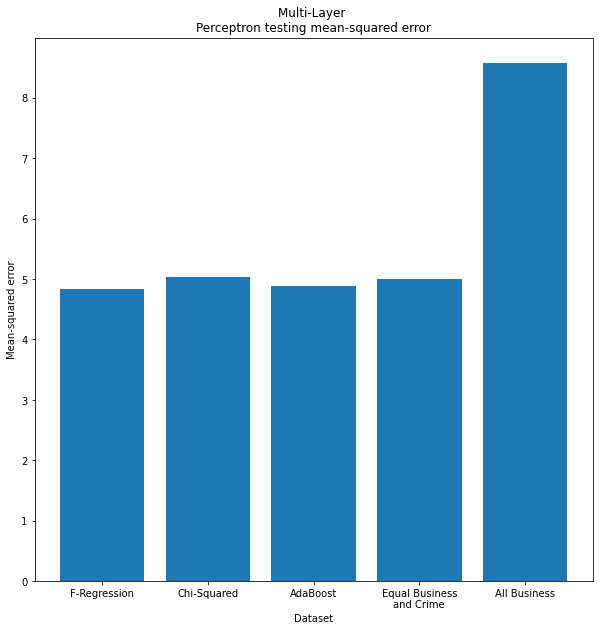

In [37]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing mean-squared error")
plt.xlabel("Dataset")
plt.ylabel("Mean-squared error")
plt.bar(y_select, mse_scores)

<BarContainer object of 5 artists>

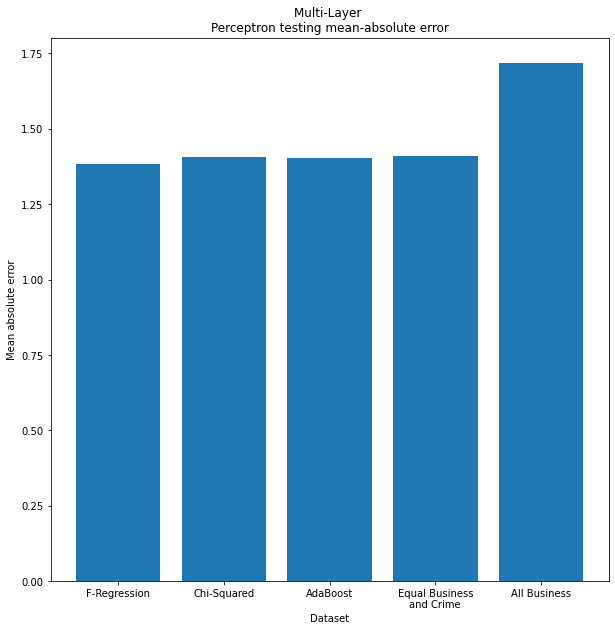

In [38]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing mean-absolute error")
plt.xlabel("Dataset")
plt.ylabel("Mean absolute error")
plt.bar(y_select, mae_scores)

<BarContainer object of 5 artists>

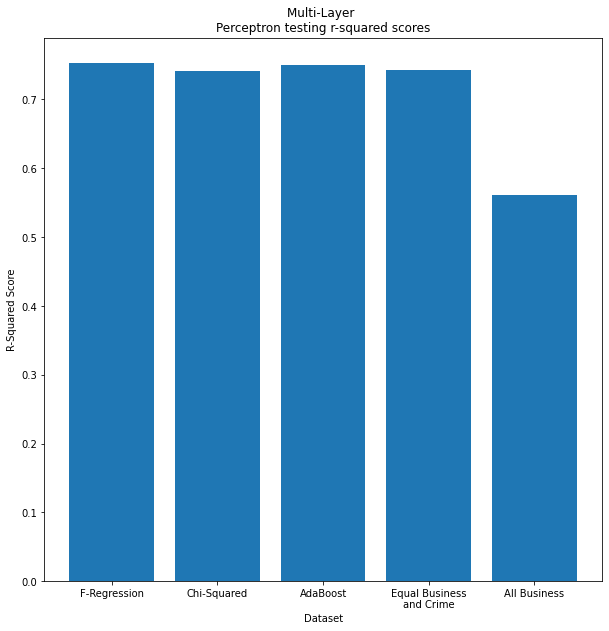

In [39]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing r-squared scores")
plt.xlabel("Dataset")
plt.ylabel("R-Squared Score")
plt.bar(y_select, r2_scores)